# K Means Clustering
<iframe src="https://giphy.com/embed/2Z8gvu6xRbqCHA0bYh" width="480" height="480" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/IntoAction-tote-bag-single-use-plastic-reusable-2Z8gvu6xRbqCHA0bYh">via GIPHY</a></p>


K Means Clustering is the first unsupervised machine learning model that we are doing to look at. The goal of K Means clustering is to group data point together that "look" similar or have similar characteristics. This can be useful when we do not have labels for our data or want to find hidden patterns in our data outside of the labels provided.

Since we do not have a y output to compare to we have to determine our error based on the input data. Lets take a high level look.

Youtube Animation Resource: https://www.youtube.com/watch?v=4b5d3muPQmA

Key Points
- K in K Means, refers to cluster
- Euclidean Distance determines what data point to assign to each cluster
- K Means can be applied to multi dimensional data 
- The Elbow Method can help us determine how many clusters are ideal - this is based on a reduction in variation.

Here we will look at a simple example



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

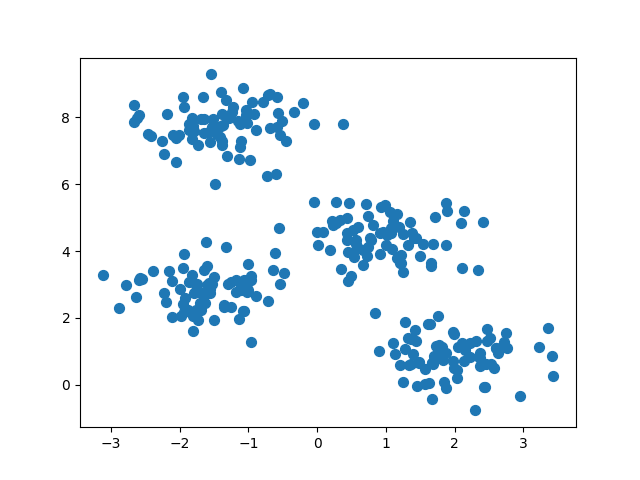

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [3]:
from sklearn.cluster import KMeans
kmeans_blobs = KMeans(n_clusters=4)
kmeans_blobs.fit(X)
y_kmeans = kmeans_blobs.predict(X)

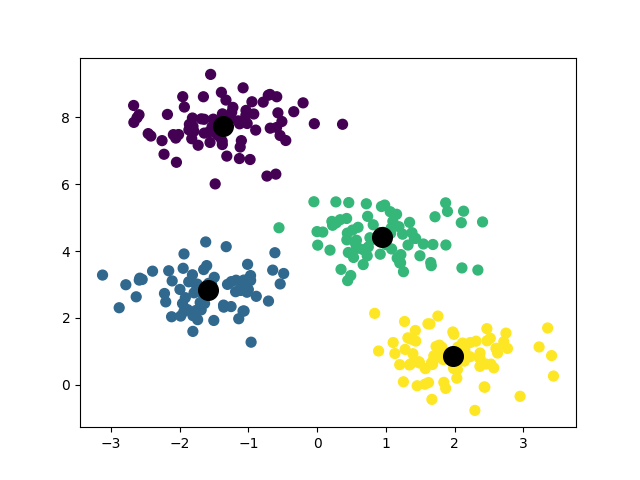

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_blobs.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
plt.show()

Now lets look a more realistic example. We can load the digits dataset, a toy dataset of low resolution of hand written numbers. In our example we can pretend that these are "Alien Hieroglyphics" so we don't know what these symbols mean - we can simulate this by not using the labels that are provided with the data set when we train our K-Means model. 

Lets go ahead and take a look at our data.

In [5]:
import pandas as pd
from sklearn.datasets import load_digits

# Look at the Data
from sklearn.datasets import fetch_openml

digits_data, digits_labels = load_digits(return_X_y=True)
digits_data = pd.DataFrame(digits_data)
(n_samples, n_features), n_digits = digits_data.shape, np.unique(digits_labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")



# digits: 10; # samples: 1797; # features 64


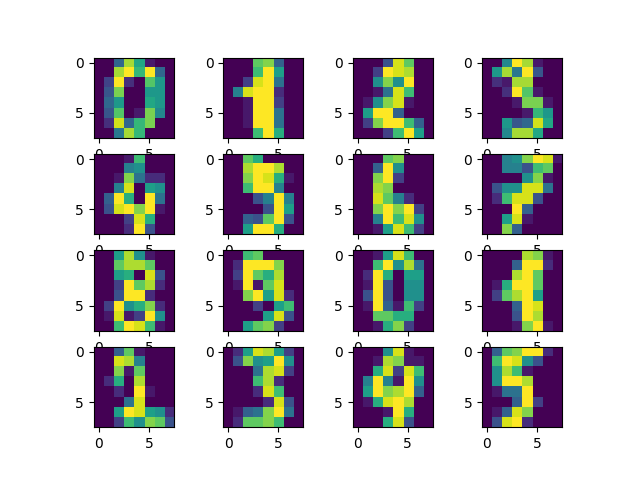

In [8]:
def show_nums(data):
    fig, axs = plt.subplots(4, 4)
    for i in range(0, 4):
        for j in range (0, 4):
            axs[i, j].imshow(data.iloc[(i*4)+j].values.reshape(8, 8 ))
    plt.show()
show_nums(digits_data)

Since we are pretending we do not know these "extratersial symbols", we do not know how many custers we should use. 

In [9]:
from sklearn.cluster import KMeans
sse = {}
for k in range(2, 40, 2):
    kmeans_digits = KMeans(n_clusters=k, max_iter=500, random_state=10)
    kmeans_digits.fit(digits_data)
    sse[k] = kmeans_digits.inertia_


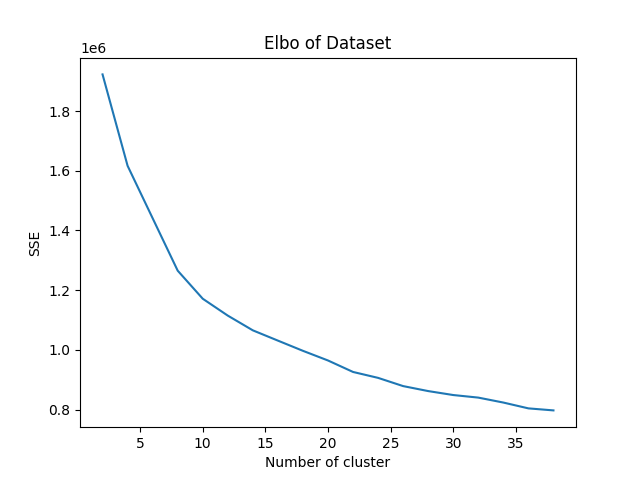

In [8]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbo of Dataset")
plt.show()

Our elbow does not seem to be obvious, the appropriate number of clusters may be between 9-12. This is where human subjectivity can come into play and with experience. We may try to look at many numbers and see if we can form our own grouping. We can also try to visualize which clusters are being formed to determine what might be the best cluster values. 

To visualize this 64 dimensional space on an x, y coordinate system, we will need to reduce the dimension size down to 2. We can use a helpful tool (which we will go into more depth next lecture) called Principle Component Analysis. At a very high level this tries to find values to the reduced dimension that best represent the full dimension.

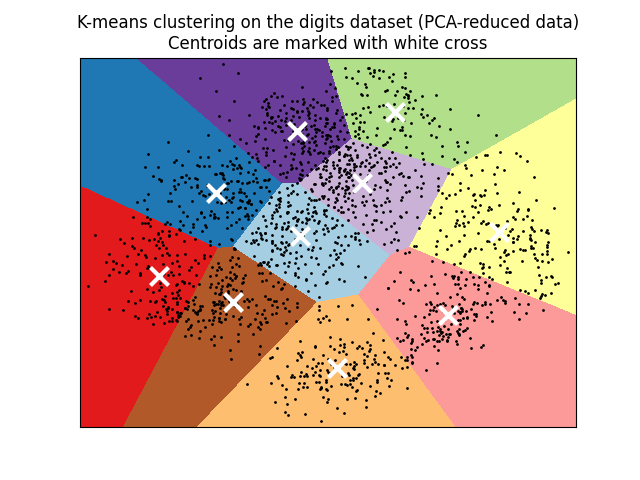

In [11]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(digits_data)
kmeans_reduced_digits = KMeans(n_clusters=n_digits, n_init=4)
kmeans_reduced_digits.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_reduced_digits.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans_reduced_digits.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## A more out of the box example

In the data science handbook for the course Jake shows a great example of thinking outside the box for using K-Mean clustering - adapted from teh scikit learn Color Quantization using K-Means clustering. 

In this example, we have an image that is high resolution, with pixel having a color representation, 8 bits for red, 8 bits for green, 8 bits for blue. This gives us up to 2^24 (16,777,216) color combinations. Since our image does not use every color, we can try to reduce the number of bits uses to represent a color by clustering similar colors together and mapping it to the mean pixel value for that cluster. - The process of representing many values by 1 value is known as quantization, this is usually done due to a reduction of precision (used due to physics constraints). In our example, we may want to reduce the image size. 

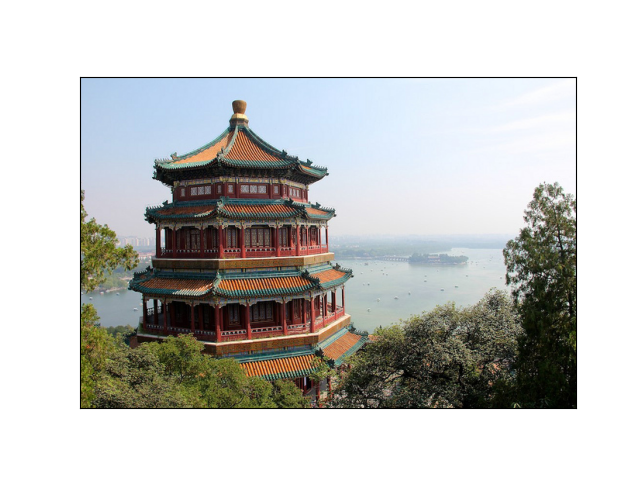

In [14]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.figure()
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
plt.show()

In [15]:
print("Shape of Image:", china.shape)

Shape of Image: (427, 640, 3)


In [16]:
# Reduce the pixel space to between 0 and 1 
data = china / 255.0  # use 0...1 scale
# Combine the row and column pixel value shapes as one vector
data = data.reshape(-1, 3)
print("New image shape: ", data.shape)


New image shape:  (273280, 3)


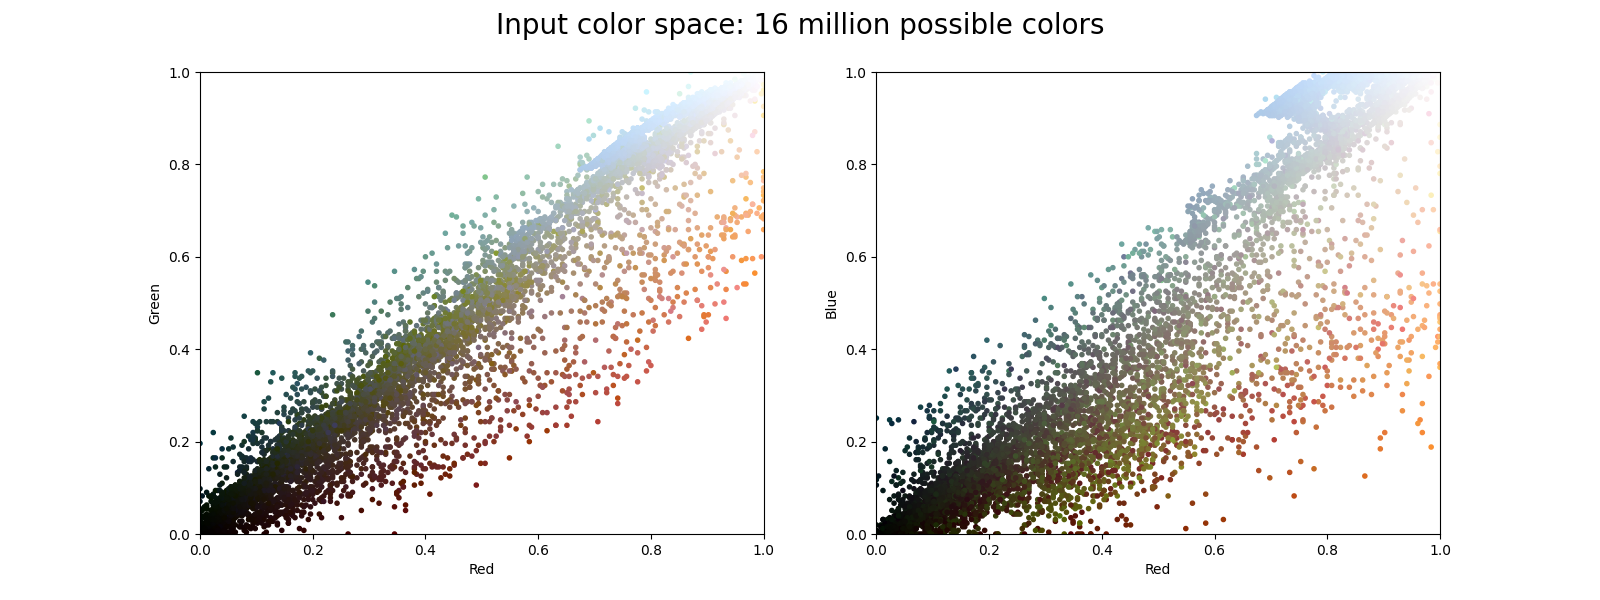

In [18]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.default_rng(0) # Creates a random generator object with a specific seed
    i = rng.permutation(data.shape[0])[:N] # Creates a random #s that do not repeat, then we grab the 10000
    colors = colors[i] # Grab the first 10000 elements 
    R, G, B = data[i].T # Transpose and split the columns (this is a cool numpy trick!)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

plot_pixels(data, title='Input color space: 16 million possible colors')

Now lets try to fit the 16 million colors down to 16 total colors using K-Means

(273280, 3)


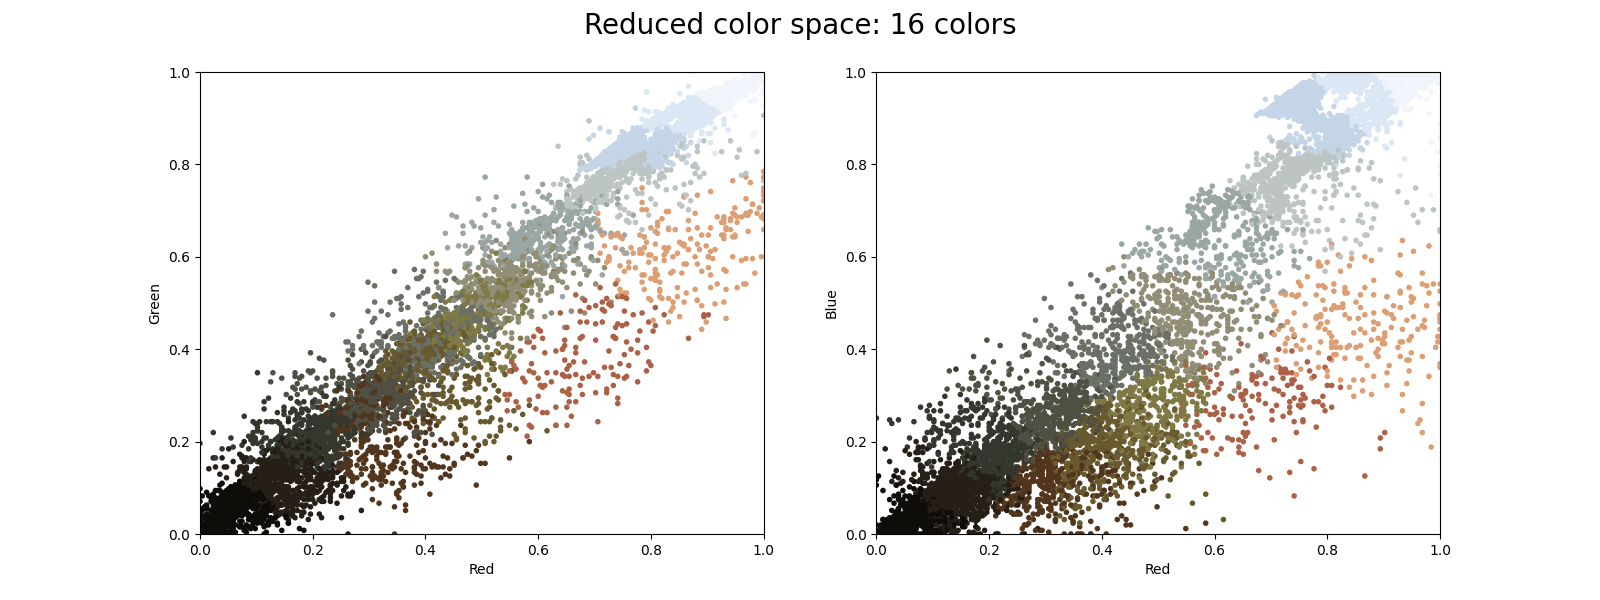

In [19]:
from sklearn.cluster import MiniBatchKMeans
# This trains K means in batches, using small amount of data to determine clusters.
#  - This is not as accurate as regular K Means but it is much faster!
kmeans_16 = MiniBatchKMeans(16) 
kmeans_16.fit(data)
new_colors = kmeans_16.cluster_centers_[kmeans_16.predict(data)] # This is a great example of Integer Array Indexing!
print(new_colors.shape)

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

Now lets recolor our original image. 

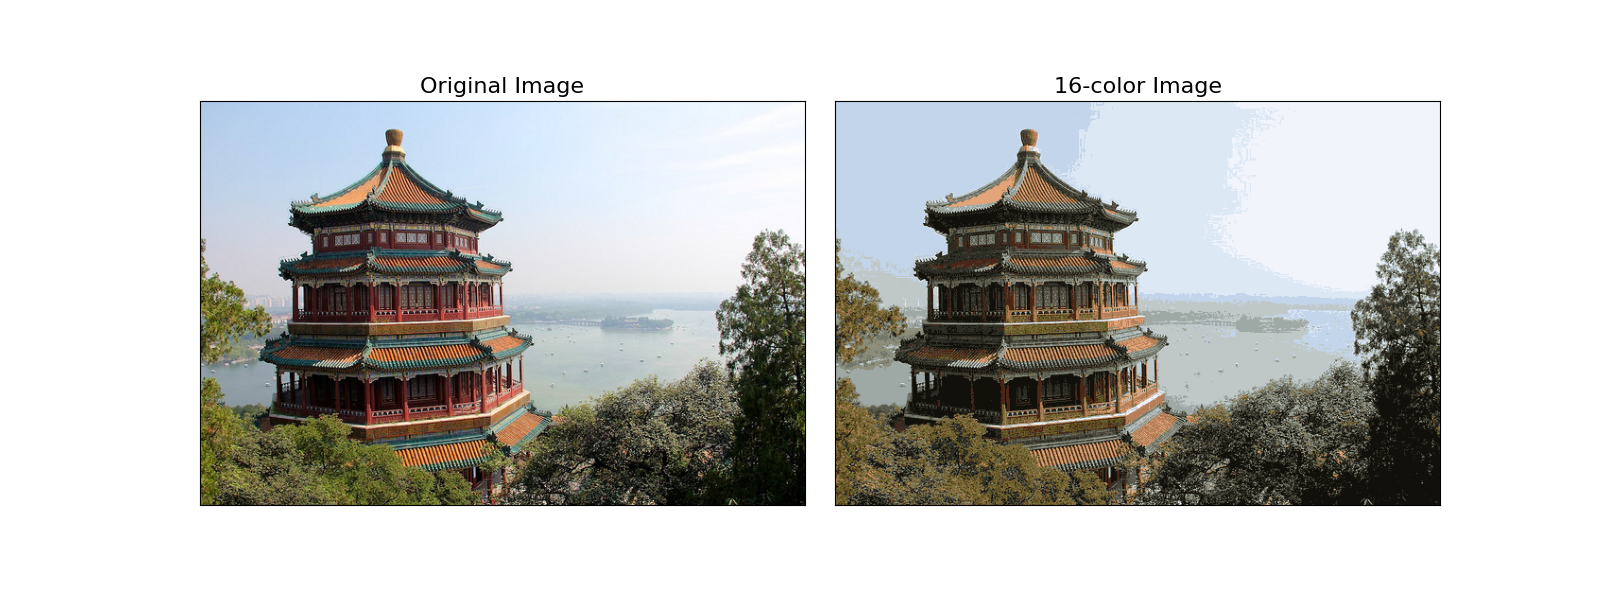

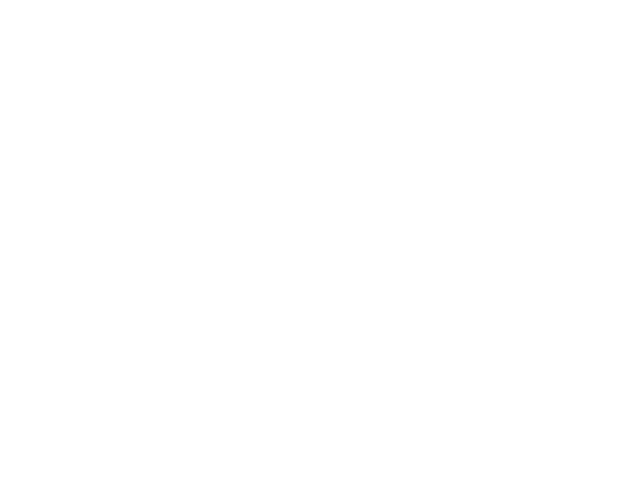

In [15]:
# Remember that new colors is matrix of our RGB values as columns so we need to reshape them back to an image shape for plotting
china_recolored = new_colors.reshape(china.shape) 
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)
plt.show()

In [16]:
# Small Example of Integer Array Indexing
x = np.arange(5, 10, 1)
print(x[[0, 0, 0, 1]])

[5 5 5 6]


Although K-Means is not a complex machine learning model, we can do a lot of really cool things with it! This is also a great tool if you do not have labeled data but want to categorize aspects of your 

Citations:
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb
- https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html